In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import seaborn as sns
import scipy.stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [219]:
df= pd.read_csv('data/train.csv')

In [220]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [221]:
def data_check(row):
    if row['three_g'] == 0 and row['four_g'] == 1:
        print(row)

def data_update(row): #0 is regular, 1 is three_g, 2 is 4
    if row['four_g'] + row['three_g'] == 0:
        return 0
    if row['four_g'] + row['three_g'] == 1:
        return 1
    if row['four_g'] + row['three_g'] == 2:
        return 2

In [222]:
df['data'] = df.apply (lambda row: data_check(row), axis=1)
df['data'] = df.apply (lambda row: data_update(row), axis=1)
df.drop(['three_g', 'four_g'], axis=1, inplace=True)

In [223]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range,data
0,842,0,2.2,0,1,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1,0
1,1021,1,0.5,1,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2,2
2,563,1,0.5,1,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2,2
3,615,1,2.5,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,2,1
4,1821,1,1.2,0,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1,2


#### Split data into test, training and validation sets


## Assumptions of Models Evaluating
- Multinomial Logistic Regression
    - Requires the observations to be independent
    - Little to no multicollinearity among independent variables
    - Linearity of independent variables and log odds
    - need a large sample size
         - a minimum of 10 cases with the least frequent outcome for                each independent variable in you model
- K-Nearest Neighbors
- Random Forest Model
- Decision Tree 
- Support Vector Machine

In [224]:
dfx = df.drop(['price_range'], axis=1)
y = df['price_range']

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   int_memory     2000 non-null   int64  
 6   m_dep          2000 non-null   float64
 7   mobile_wt      2000 non-null   int64  
 8   n_cores        2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  touch_screen   2000 non-null   int64  
 17  wifi           2000 non-null   int64  
 18  price_ra

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   int_memory     2000 non-null   int64  
 6   m_dep          2000 non-null   float64
 7   mobile_wt      2000 non-null   int64  
 8   n_cores        2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  touch_screen   2000 non-null   int64  
 17  wifi           2000 non-null   int64  
 18  price_ra

In [227]:
#Create validation, training and test sets
x_train, x_rem, y_train, y_rem = train_test_split(dfx, y, train_size=0.7, random_state=495838, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.3333, random_state=495839)

In [228]:
print(x_train.shape), print(y_train.shape)
print(x_val.shape), print(y_val.shape)
print(x_test.shape), print(y_test.shape)

(1400, 19)
(1400,)
(400, 19)
(400,)
(200, 19)
(200,)


(None, None)

In [229]:

cat_cols = ['blue', 'dual_sim', 'touch_screen', 'wifi', 'data']
x_train[cat_cols] = x_train[cat_cols].astype('category')
x_test[cat_cols] = x_test[cat_cols].astype('category')
y_train = y_train.astype('category')
y_test = y_test.astype('category')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [254]:
feature_dfs = [x_train, x_val, x_test]
y_test.head()

1408    0
658     3
1223    3
297     1
1772    3
Name: price_range, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [231]:
#Instantiate Models
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
dec_tree = tree.DecisionTreeClassifier()
svm_mod = svm.SVC()

In [232]:
forest.fit(x_train,y_train)
knn.fit(x_train,y_train)
log.fit(X=x_train,y=y_train)
dec_tree.fit(x_train,y_train)
svm_mod.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [233]:
def cross_val_perf(model_name, model_instaniation, X, Y, subsets, score_type):
    scores = cross_val_score(model_instaniation, X, Y, cv=subsets, scoring = score_type)
    print(model_name)
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    print('-------------------------------------------------------------------------------------------------------')


def eval_perf(model_title, real_results, pred):
    print(model_title + '\n' + classification_report(real_results, pred))
    print('\n--------------------------------------------------------------------------------------------------\n')

In [234]:
cross_val_perf('Random Forest', forest, x_train, y_train, 10, 'accuracy')

Random Forest
Scores: [0.9        0.85714286 0.88571429 0.84285714 0.93571429 0.85714286
 0.82142857 0.85       0.84285714 0.87142857]
Mean: 0.8664285714285713
Standard Deviation: 0.03146912967415814
-------------------------------------------------------------------------------------------------------


In [235]:
cross_val_perf('K Nearest Neighbors', knn, x_train, y_train, 10, 'accuracy')

K Nearest Neighbors
Scores: [0.89285714 0.95       0.92142857 0.92857143 0.94285714 0.93571429
 0.86428571 0.91428571 0.92142857 0.95      ]
Mean: 0.9221428571428569
Standard Deviation: 0.02544501875793837
-------------------------------------------------------------------------------------------------------


In [236]:
cross_val_perf('Multinomial Logistic Regression', log, x_train, y_train, 10, 'accuracy')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Multinomial Logistic Regression
Scores: [0.7        0.63571429 0.67142857 0.67142857 0.7        0.70714286
 0.67857143 0.73571429 0.7        0.71428571]
Mean: 0.6914285714285715
Standard Deviation: 0.026496052844273463
-------------------------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [237]:
cross_val_perf('Decision Tree', dec_tree, x_train, y_train, 10, 'accuracy')

Decision Tree
Scores: [0.78571429 0.8        0.8        0.81428571 0.89285714 0.85714286
 0.79285714 0.81428571 0.77142857 0.83571429]
Mean: 0.8164285714285715
Standard Deviation: 0.03455991543829413
-------------------------------------------------------------------------------------------------------


In [238]:
 cross_val_perf('Support Vector Machine', svm_mod, x_train, y_train, 10, 'accuracy')

Support Vector Machine
Scores: [0.92857143 0.98571429 0.92857143 0.91428571 0.97857143 0.96428571
 0.93571429 0.92142857 0.95714286 0.96428571]
Mean: 0.9478571428571427
Standard Deviation: 0.02391524148969031
-------------------------------------------------------------------------------------------------------


In [239]:
accuracy_results = {'Model': ['Support Vector Machine', 'K Nearest Neighbors', 'Random Forest', 'Decision Tree', 'Multinomial Logistic Regression'],
                    'Accuracy (%)': ['94.56', '91.56', '86.69', '81.69', '71.00']}
pd.DataFrame(accuracy_results)

,Model,Accuracy (%)
0,Support Vector Machine,94.56
1,K Nearest Neighbors,91.56
2,Random Forest,86.69
3,Decision Tree,81.69
4,Multinomial Logistic Regression,71.00


Ultimately chose to work with Random Forest:
No Assumptions are needed and relatively easy to work with. The accuracy of the model is very high. Once adjusting some hyperparameters, we can increase the accuracy.

In [250]:
def get_best_params(X, Y, param_dict, estimator, subset_num, model_name):
    #Grid Search
    grid_cv = GridSearchCV(estimator=estimator, param_grid=param_dict, cv=subset_num)
    grid_cv.fit(X, Y)
    print('Best ' + model_name + ' Parameters: {} '.format(grid_cv.best_params_))
    print('Best Score is: {}'.format(grid_cv.best_score_))

def find_importance(df, model):
    columns = df.columns
    weights = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': columns, 'Weight':np.abs(weights)})
    feature_importance = feature_importance.sort_values(by='Weight', ascending=False)
    return feature_importance

In [251]:
forest.feature_importances_

array([0.0758278 , 0.00663484, 0.03030186, 0.0061968 , 0.02462865,
       0.03653169, 0.02547708, 0.03939583, 0.0225525 , 0.03104727,
       0.05509744, 0.05696304, 0.4788101 , 0.02831024, 0.02769866,
       0.03092032, 0.00683965, 0.00675784, 0.0100084 ])

Text(0.5, 1.0, 'Feature Importance')

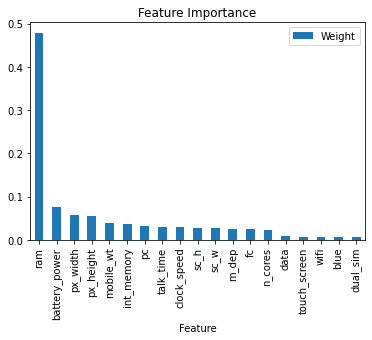

In [257]:
importance = find_importance(x_train, forest)
importance.plot.bar(x='Feature')
plt.title('Feature Importance')

In [258]:
for dataset in feature_dfs:
    dataset.drop(['data', 'touch_screen', 'wifi', 'blue', 'dual_sim'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [263]:
forest.fit(x_train,y_train)


Random Forest
Scores: [0.9        0.85       0.87857143 0.85714286 0.92142857 0.85714286
 0.83571429 0.87142857 0.89285714 0.87857143]
Mean: 0.8742857142857143
Standard Deviation: 0.02436960301318854
-------------------------------------------------------------------------------------------------------


In [274]:
cross_val_perf('Random Forest', forest, x_train, y_train, 10, 'accuracy')

Random Forest
Scores: [0.87857143 0.89285714 0.85       0.87142857 0.92142857 0.87857143
 0.84285714 0.89285714 0.87142857 0.87142857]
Mean: 0.8771428571428572
Standard Deviation: 0.021140926552783913
-------------------------------------------------------------------------------------------------------


In [267]:
y_pred1 = forest.predict(x_val)
eval_perf('First Look Validation Set', y_val, y_pred1)

First Look Validation Set
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        88
           1       0.86      0.88      0.87       108
           2       0.83      0.85      0.84        97
           3       0.93      0.87      0.90       107

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400


--------------------------------------------------------------------------------------------------



In [270]:
# Find the best hyperparameters
# param_dict = {
#     'bootstrap': [True, False],
#     'n_estimators': [50, 100, 500, 1000],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [5, 10, 20],
#     'max_depth': [5, 10, 25]
# }
# grid_cv = GridSearchCV(estimator=forest, param_grid=param_dict, cv=5)
# grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 25],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [50, 100, 500, 1000]})

In [272]:
# grid_cv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 500}

#### Best Parameters Given
- bootstrap = True
- criterion = entropy
- max_depth = 10
- min_samples_split = 5
- n_estimators = 500

## Final Model Fitting


In [278]:
forest = RandomForestClassifier(bootstrap=True, criterion='entropy', 
          max_depth=10, min_samples_split=5, n_estimators=500)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=500)

In [279]:
y_pred2 = forest.predict(x_val)
eval_perf('First Look Validation Set', y_val, y_pred2) #Accuracy Improved by 2%

First Look Validation Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        88
           1       0.87      0.90      0.89       108
           2       0.86      0.86      0.86        97
           3       0.95      0.92      0.93       107

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400


--------------------------------------------------------------------------------------------------



In [281]:
final_pred = forest.predict(x_test)
eval_perf('Testing Data Metrics', y_test, final_pred)

Testing Data Metrics
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        62
           1       0.72      0.67      0.69        42
           2       0.85      0.83      0.84        53
           3       0.95      0.98      0.97        43

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200


--------------------------------------------------------------------------------------------------



Text(0.5, 1.0, 'Feature Importance')

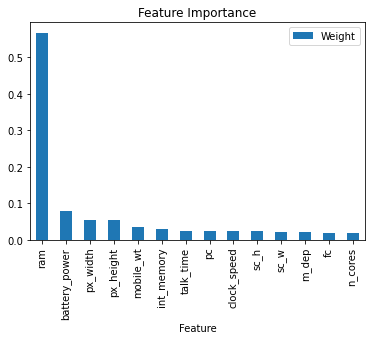

In [282]:
importance = find_importance(x_test, forest)
importance.plot.bar(x='Feature')
plt.title('Feature Importance')

# Remarks
- Cant' evaluate multiclass using ROC and Precision recall
- The following link helps explainthe classification metrics
https://medium.com/apprentice-journal/evaluating-multi-class-classifiers-12b2946e755b


[Text(0, 0, 'Low'),
 Text(0, 1, 'Below Average'),
 Text(0, 2, 'Above Average'),
 Text(0, 3, 'High')]

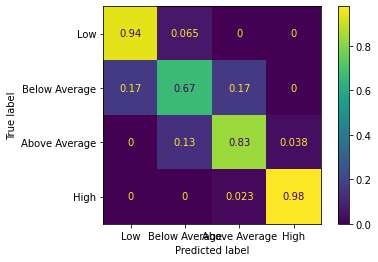

In [304]:
#Normalized over true label
fig, ax = plt.subplots()
plot_confusion_matrix(forest, x_test, y_test, ax=ax, normalize='true')
labels = ['Low', 'Below Average', 'Above Average', 'High']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

200